## Overview: 

In this project, you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem.
Always comment your results, preferably in a separate markdown cell.


In [2]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       7.4.0 (need at least 1.0)
Numpy version:        1.16.2 (need at least 1.7.1)
SciPy version:         1.2.1 (need at least 0.12.0)
Pandas version:       0.24.2 (need at least 0.11.0)
Mapltolib version:     3.0.3 (need at least 1.2.1)
Scikit-Learn version: 0.20.3 (need at least 0.13.1)


## Preliminaries

You should also make sure the following libraries load correctly.
Below are a few basic data description tasks already done for you. 

In [3]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
path = os.getcwd()
#print(path)
flights_df= pd.read_csv('flights.csv.bz2')

In [4]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
## print the first and last few lines of the data
print("head\n")
flights_df.head()

head



,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [6]:
print("tail\n")
flights_df.tail()

tail



,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [7]:
## Find the number of unique destinations in the data ('dest')
print("destinations:\n")
flights_df.dest.unique()

flights_df['origin'].unique()

destinations:



array(['EWR', 'LGA', 'JFK'], dtype=object)

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)

How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [8]:
#newdf will have all the rows from NYC to LAX
#We will be using this data for the rest of the question
newdf = flights_df[((flights_df['origin']=='LGA') | (flights_df['origin']=='EWR') | (flights_df['origin']=='JFK')) & (flights_df['dest']=='LAX')]
len(newdf)


16174

 _There are totally 16174 flights from NYC to LAX_

### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [9]:
# Check number of flights for each airline
newdf['carrier'].value_counts()

UA    5823
AA    3582
VX    2580
DL    2501
B6    1688
Name: carrier, dtype: int64

_The carrier that has the most number of flights from NYC to LAX is UA with a total of 5823 flights._
_The carrier that has the least number of flights from NYC to LAX is B6 with a total of 1688 flights._

### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [10]:
#Checking the unique tailnums flying from NYC to LAX
newdf['tailnum'].nunique()

991

_The number of unique air planes flying from NYC to LAX are 991_

### (d)

What is the average arrival delay for flights from NYC to LAX?

In [11]:
#Checking the mean of arrival delay
newdf['arr_delay'].mean(skipna=True)

0.5471109447148383

_The average arrival delay for flight from NYC to LAX is 0.547_

### (e)

What proportion of flights to LAX come from each NYC airport?

In [19]:
#Grouping by origin to check the number of flights from each origin
newdf.groupby('origin')['dest'].value_counts()

print("Proportion of flights from EWR: ", round(4912/(4912+11262), 3) )
print("Proportion of flights from JFK: ", round(11262/(4912+11262), 3) )

Proportion of flights from EWR:  0.304
Proportion of flights from JFK:  0.696


_There are 11262 flights from JFK to LAX and 4912 flights from EWR to LAX_

## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [13]:
#Making a copy of the flights data set in order to not lose the original data 
newdf2 = flights_df
#Making a new column date by combining year, month and day
newdf2['date'] = pd.to_datetime(newdf2[['year','month','day']])
#Checking the length of the data set
len(newdf2)

336776

In [14]:
#Average arrival delay per date and checking the highest values
newdf2.groupby('date')['arr_delay'].mean().sort_values(ascending=False).head(1)

date
2013-03-08    85.862155
Name: arr_delay, dtype: float64

In [15]:
#Average arrival delay per date and checking the highest values
newdf2.groupby('date')['dep_delay'].mean().sort_values(ascending=False).head(1)

date
2013-03-08    83.536921
Name: dep_delay, dtype: float64

_Date 2013-03-08 has the highest average of arrival and departure delays of 85.86 and 83.53 mins respectively_

### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

In [20]:
#Making a data set with only positive delays
df_positive_delay = newdf2[(newdf2['arr_delay']>0) & (newdf2['dep_delay']>0)]

#Worst day
df_positive_delay.groupby('date')['dep_delay'].max().sort_values(ascending=False).head(1)

date
2013-01-09    1301.0
Name: dep_delay, dtype: float64

_The worst day to flight out of NYC was on 2013-01-09 in 2013 since that has the highest departure delay of the whole year_

In [21]:
#Worst day-arrival
df_positive_delay.groupby('date')['arr_delay'].max().sort_values(ascending=False).head(1)

date
2013-01-09    1272.0
Name: arr_delay, dtype: float64

_The worst day to flight out of NYC was on 2013-01-09 in 2013 since that has the highest arrival delay of the whole year_

In [22]:
#Best day
df_positive_delay.groupby('date')['dep_delay'].min().sort_values(ascending=False).head(1)

date
2013-01-19    3.0
Name: dep_delay, dtype: float64

_The best day to fly out of NYC was on 2013-01-19 in 2013 since that has the lowest departure delay of the whole year_

In [23]:
#Best day-arrival
df_positive_delay.groupby('date')['arr_delay'].min().sort_values(ascending=False).head(1)

date
2013-01-01    2.0
Name: arr_delay, dtype: float64

_The best day to fly out of NYC was on 2013-01-01 in 2013 since that has the lowest arrival delay of the whole year_

### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [24]:
#Lowest average delay by carrier
newdf2.groupby('carrier')['dep_delay'].mean().sort_values().head(1)


carrier
US    3.782418
Name: dep_delay, dtype: float64

_US has the lowest average departure delay in 2013 of 40.09_

In [25]:
#greatest avg delay by carrier
newdf2.groupby('carrier')['dep_delay'].mean().sort_values(ascending=False).head(1)

carrier
F9    20.215543
Name: dep_delay, dtype: float64

_F9 has the highest average departure delay in 2013 of 20.21_

### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

In [26]:
#Monthly departure delay count
df_positive_delay.groupby('month')['dep_delay'].count()

month
1      7083
2      6650
3      8000
4      8234
5      7652
6      9543
7     10268
8      8128
9      4666
10     5895
11     5711
12    10473
Name: dep_delay, dtype: int64

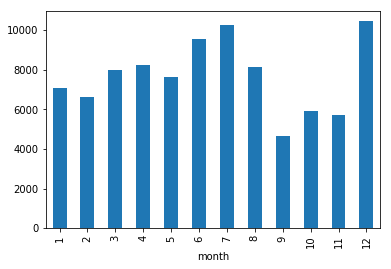

In [27]:
#Monthly departure delay count
df_positive_delay.groupby('month')['dep_delay'].count().plot(kind='bar')


_As we can see from the plot and the answer that Month 6,7 and 12 have the highest departure delays. These are usually months of holidays. December christmas and new year vacations and  June and July are summer months._

### (e)

On average, how do departure delays vary over the course of a day?

In [28]:
#Grouping by hour and checking how many flights were delayed in that hour
df_positive_delay.groupby('hour')['dep_delay'].count().sort_values(ascending=False)

hour
17.0    8273
18.0    7877
19.0    7718
16.0    7508
15.0    7336
20.0    7168
21.0    6217
14.0    5199
13.0    4850
8.0     4027
12.0    3941
22.0    3829
9.0     3686
10.0    3421
11.0    3255
7.0     2556
6.0     2137
23.0    2020
0.0      815
1.0      221
5.0      158
2.0       63
24.0      17
3.0       11
Name: dep_delay, dtype: int64

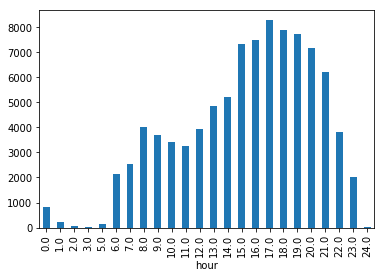

In [29]:
#Visualization
df_positive_delay.groupby('hour')['dep_delay'].count().plot(kind='bar')

_Typically, the departure delays are the most between 3pm(15:00) - 9pm(21:00). These are rush hour times, so it makes sense that most delays happen at this time._ 

## Question 3

Which flight departing NYC in 2013 flew the slowest?

Note: compute the speed as distance/time.

In [30]:
#Making a dummy data set to change values
dummy = newdf2

In [31]:
#Dropping index
dummy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [32]:
#Dropping NAs
dummy.dropna(subset=['distance']).head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


In [33]:
#Dropping NAs
dummy.dropna(subset=['air_time']).head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


In [34]:
#Making Speed column
dummy['speed'] = dummy['distance'] / dummy['air_time']
dummy.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,speed
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01,6.167401
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01,6.237885
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01,6.806250
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01,8.612022
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01,6.568966


In [35]:
#Flight details of the flight that flew the slowest.
dummy.loc[dummy['speed'].idxmin()]

year                        2013
month                          1
day                           28
dep_time                    1917
dep_delay                     52
arr_time                    2118
arr_delay                    103
carrier                       US
tailnum                   N755US
flight                      1860
origin                       LGA
dest                         PHL
air_time                      75
distance                      96
hour                          19
minute                        17
date         2013-01-28 00:00:00
speed                       1.28
Name: 24098, dtype: object

_Although I think that flying "slowest" means the flight that took most time. The question has asked us with regards to speed._

_With regards to speed, the flight that flew the slowest was flight 1860 from US airlines flying from LGA to PHL with a flight speed of 1.28_

## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [36]:
#Subsetting the data
everyday_flight = newdf2[['dest','carrier','flight','date','day']]

#Checking the group of carrier, flight, dest date wise and checking the size
new_group = everyday_flight.groupby(['dest','carrier','flight'])['date'].size().sort_values(ascending=False).reset_index(name='counts')

In [37]:
#All the group of dest carrier and flight that flew all year round
new_group[new_group['counts'] == 365]
    

,dest,carrier,flight,counts
0,SRQ,B6,431,365
1,SJU,B6,703,365
2,LAX,AA,181,365
3,MIA,AA,1611,365
4,BUR,B6,359,365
5,MCO,B6,1783,365
6,TPA,DL,2391,365
7,HNL,UA,15,365
8,LAX,VX,413,365
9,SFO,AA,59,365


In [38]:
#All the unique destinations to which flights flew the entire year.
new_group[new_group['counts'] == 365].groupby('dest').size()


dest
BUR    1
CLT    1
FLL    1
HNL    1
IAD    1
LAS    1
LAX    4
MCO    2
MIA    1
SFO    1
SJU    2
SRQ    1
TPA    1
dtype: int64

_Above displayed are all the destinations to which the flights flew all 365 days._

## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.

_REASEARCH QUESTION: Which route has the most number of delays? Both arrival and departure. Does any carrier perform very badly in a month?
This question is important in order to know which month to fly in and which carrier should I use for the same_

In [39]:
#Which route(origin, dest) has the highest number of departure delays
flights_df.groupby(['origin','dest'])['dep_delay'].count().sort_values(ascending=False).head(5)

origin  dest
JFK     LAX     11196
LGA     ATL     10082
        ORD      8548
JFK     SFO      8138
LGA     CLT      5969
Name: dep_delay, dtype: int64

_JFK to LAX has the highest number of delays according to this data set_

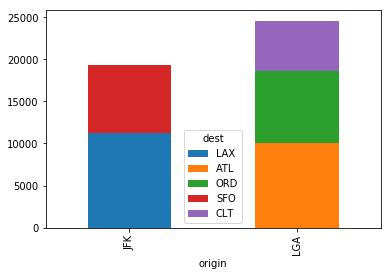

In [40]:
#figure
flights_df.groupby(['origin','dest'])['dep_delay'].count().sort_values(ascending=False).head(5).unstack().plot(kind='bar',stacked=True)
plt.show()

_Above is a visualization to support my answer_

In [41]:
#According to arrival delay
flights_df.groupby(['origin','dest'])['arr_delay'].count().sort_values(ascending=False).head(5)

origin  dest
JFK     LAX     11159
LGA     ATL     10041
        ORD      8507
JFK     SFO      8109
LGA     CLT      5961
Name: arr_delay, dtype: int64

_Even according to the arrival delay, JFK to LAX has the highest delays_

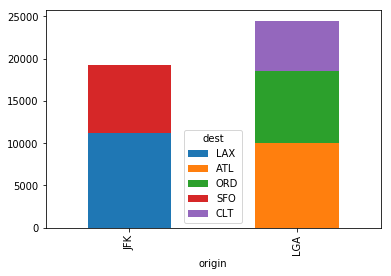

In [42]:
#Visualization
flights_df.groupby(['origin','dest'])['arr_delay'].count().sort_values(ascending=False).head(5).unstack().plot(kind='bar',stacked=True)

_Visualization to support my answer_

_QUESTION: Does any carrier perform badly on any particular month?_

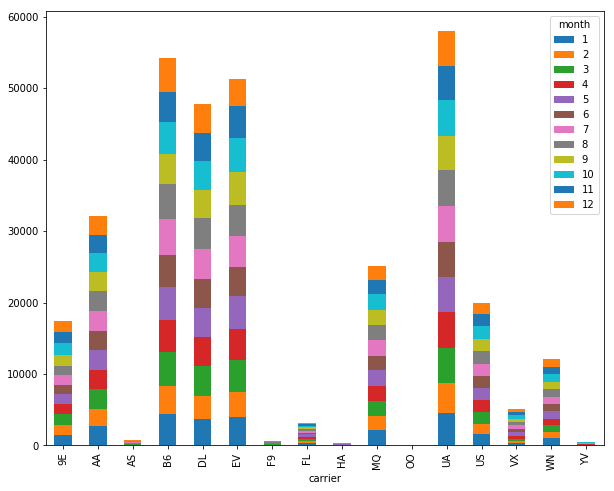

In [43]:
#Grouping by carrier and month and checking departure delay
flights_df.groupby(['carrier', 'month'])['dep_delay'].count().unstack().plot(kind='bar',stacked=True, figsize=(10,8))
plt.show()

_UA seems to has the highest delay but it is consistent throughout the year. All the carriers seem to perform the same throughout the year._
_Therefore, from the above analysis, I would not be taking JFK to LAX route since it has the highest departure and arrival delays. If I want to fly to LAX, I would go through EWR._


## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [44]:
#Loading the weather data
weather_df = pd.read_csv('weather.csv.bz2')

In [45]:
#Grouping by year, month, day, origin
weather_df = pd.DataFrame(weather_df.groupby(['year','month','day','origin']).mean())

In [46]:
weather_df.head()

Unnamed: 0       hour     temp       dewp      humid  \
year month day origin                                                         
2013 1.0   1.0 EWR           12.0  11.782609  38.4800  25.050435  58.386087   
           2.0 EWR           35.5  11.500000  28.8350  11.382500  47.786250   
           3.0 EWR           59.5  11.500000  29.4575  14.780000  54.395833   
           4.0 EWR           83.5  11.500000  33.4775  19.205000  55.880417   
           5.0 EWR          107.5  11.500000  36.7325  19.242500  49.284583   

                         wind_dir  wind_speed  wind_gust  precip     pressure  \
year month day origin                                                           
2013 1.0   1.0 EWR     263.043478   12.758648  14.682397     0.0  1012.442857   
           2.0 EWR     307.916667   12.514732  14.401704     0.0  1017.337500   
           3.0 EWR     276.956522    7.863663   9.049346     0.0  1021.058333   
           4.0 EWR     242.916667   13.857309  15.946714     0.0  1017.533333   
           5.0 EWR     271.666667   10.836512  12.470441     0.0  1021.120833   

                       visib  
year month day origin         
2013 1.0   1.0 EWR      10.0  
           2.0 EWR      10.0  
           3.0 EWR      10.0  
           4.0 EWR      10.0  
           5.0 EWR      10.0

In [47]:
#Resetting the index to normalize the columns and get rid of group indexes
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)

In [48]:
#Retaining the useful columns
weather_df =  pd.DataFrame(weather_df[['origin','year','month','day','temp','dewp','humid','wind_dir',
                                       'wind_speed','wind_gust','precip','pressure','visib']]) 
weather_df.head()

,origin,year,month,day,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013,1.0,1.0,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0
1,EWR,2013,1.0,2.0,28.8350,11.382500,47.786250,307.916667,12.514732,14.401704,0.0,1017.337500,10.0
2,EWR,2013,1.0,3.0,29.4575,14.780000,54.395833,276.956522,7.863663,9.049346,0.0,1021.058333,10.0
3,EWR,2013,1.0,4.0,33.4775,19.205000,55.880417,242.916667,13.857309,15.946714,0.0,1017.533333,10.0
4,EWR,2013,1.0,5.0,36.7325,19.242500,49.284583,271.666667,10.836512,12.470441,0.0,1021.120833,10.0


In [49]:
#Making flights uniform with weather data
flights_agg = flights_df.groupby(['year','month','day','origin']).mean()
flights_agg.reset_index(level = 0, inplace = True)
flights_agg.reset_index(level = 0, inplace = True)
flights_agg.reset_index(level = 0, inplace = True)
flights_agg.reset_index(level = 0, inplace = True)

In [50]:
flights_agg.head()

,origin,day,month,year,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,speed
0,EWR,1,1,2013,1407.332237,17.483553,1568.815182,20.886667,2276.868852,166.886667,1043.259016,13.779605,29.371711,5.891418
1,JFK,1,1,2013,1448.209459,12.219595,1595.567568,8.088136,1165.316498,192.722034,1296.690236,14.165541,31.655405,6.227378
2,LGA,1,1,2013,1277.831933,3.134454,1512.785714,7.885593,2054.816667,144.330508,849.520833,12.449580,32.873950,5.701970
3,EWR,2,1,2013,1345.773256,25.322674,1514.172012,25.439883,2389.082857,159.196481,1002.974286,13.151163,30.656977,5.955132
4,JFK,2,1,2013,1409.968750,8.143750,1570.341693,3.268139,1270.915888,185.772871,1285.716511,13.790625,30.906250,6.331770


In [51]:
#Taking necessary columns
flights_agg = flights_agg[['origin','year','month','day','dep_delay','arr_delay','speed']]
flights_agg.head()

# Merging datasets
flights_weather = pd.merge(weather_df,flights_agg, on = ['year','month','day','origin'], how = 'inner')

In [52]:
flights_weather.head()

,origin,year,month,day,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,dep_delay,arr_delay,speed
0,EWR,2013,1.0,1.0,38.4800,25.050435,58.386087,263.043478,12.758648,14.682397,0.0,1012.442857,10.0,17.483553,20.886667,5.891418
1,EWR,2013,1.0,2.0,28.8350,11.382500,47.786250,307.916667,12.514732,14.401704,0.0,1017.337500,10.0,25.322674,25.439883,5.955132
2,EWR,2013,1.0,3.0,29.4575,14.780000,54.395833,276.956522,7.863663,9.049346,0.0,1021.058333,10.0,8.450450,6.102719,6.083438
3,EWR,2013,1.0,4.0,33.4775,19.205000,55.880417,242.916667,13.857309,15.946714,0.0,1017.533333,10.0,12.103858,1.768546,6.332914
4,EWR,2013,1.0,5.0,36.7325,19.242500,49.284583,271.666667,10.836512,12.470441,0.0,1021.120833,10.0,5.696203,-1.367089,6.235933


Text(0.5, 1.0, 'Temp Vs. Departure Delay')

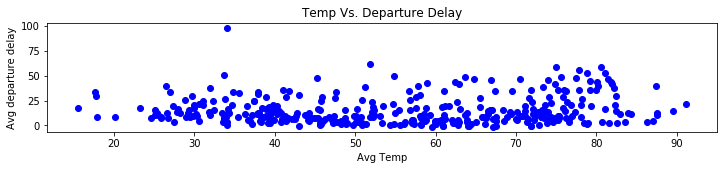

In [53]:
#Temp vs Dep delay
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,2))
axes.scatter(flights_weather['temp'], flights_weather['dep_delay'], c = 'blue')
xlabel('Avg Temp')
ylabel('Avg departure delay')
title('Temp Vs. Departure Delay')

Text(0.5, 1.0, 'Visibility Vs. Departure Delay')

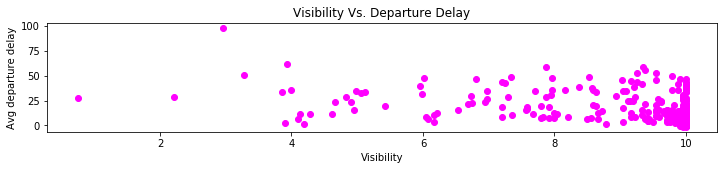

In [54]:
#Visib vs Dep Delay
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,2))
axes.scatter(flights_weather['visib'], flights_weather['dep_delay'], c = 'magenta')
xlabel('Visibility')
ylabel('Avg departure delay')
title('Visibility Vs. Departure Delay')

Text(0.5, 1.0, 'Precipitation Vs. Departure Delay')

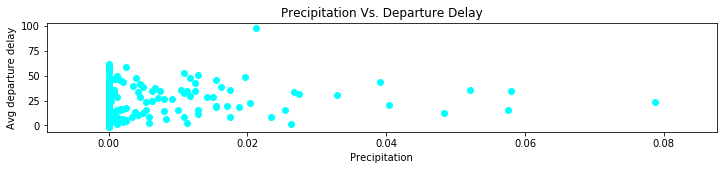

In [55]:
#Precipitation vs Dep Delay
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,2))
axes.scatter(flights_weather['precip'], flights_weather['dep_delay'], c = 'cyan')
xlabel('Precipitation')
ylabel('Avg departure delay')
title('Precipitation Vs. Departure Delay')

Text(0.5, 1.0, 'Wind speed Vs. Departure Delay')

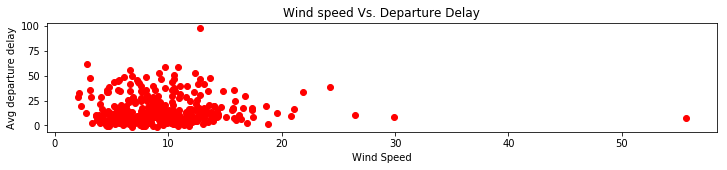

In [56]:
#Wind Speed vs Dep Delay
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,2))
axes.scatter(flights_weather['wind_speed'], flights_weather['dep_delay'], c = 'red')
xlabel('Wind Speed')
ylabel('Avg departure delay')
title('Wind speed Vs. Departure Delay')

Text(0.5, 1.0, 'Pressure Vs. Departure Delay')

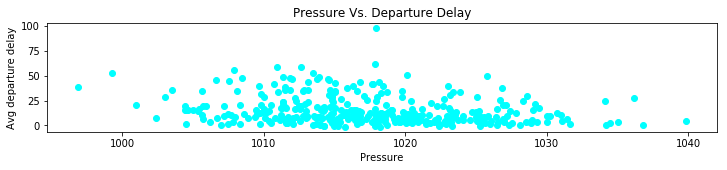

In [57]:
#Pressure vs Dep Delay
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,2))
axes.scatter(flights_weather['pressure'], flights_weather['dep_delay'], c = 'cyan')
xlabel('Pressure')
ylabel('Avg departure delay')
title('Pressure Vs. Departure Delay')

Text(0.5, 1.0, 'Humidity Vs. Departure Delay')

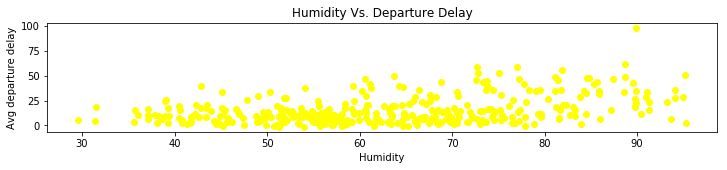

In [58]:
#Humidity vs Dep Delay
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,2))
axes.scatter(flights_weather['humid'], flights_weather['dep_delay'], c = 'yellow')
xlabel('Humidity')
ylabel('Avg departure delay')
title('Humidity Vs. Departure Delay')

_From the above visualizations:_

_Departure delay is evenly distributed for Humidity, Pressure and Temperature._

_Departure delay is uneven for the rest of the parameters._

_Now let's see how they are in models._

In [59]:
#To create linear models
import statsmodels.formula.api as sm

In [60]:
#Dep delay and temp
model1 = sm.ols(formula='dep_delay ~ temp', data=flights_weather).fit()

In [61]:
#Parameters of the model
print("The regression coefficients for the dep_delay and temp model are: \n", model1.params)

The regression coefficients for the dep_delay and temp model are: 
 Intercept    10.720439
temp          0.080707
dtype: float64


In [62]:
model2 = sm.ols(formula='dep_delay ~ visib', data=flights_weather).fit()

In [63]:
print("The regression coefficients for the dep_delay and visib model are: \n", model2.params)

The regression coefficients for the dep_delay and visib model are: 
 Intercept    46.574289
visib        -3.409740
dtype: float64


In [64]:
model3 = sm.ols(formula='dep_delay ~ precip', data=flights_weather).fit()

In [65]:
print("The regression coefficients for the dep_delay and precip model are: \n", model3.params)

The regression coefficients for the dep_delay and precip model are: 
 Intercept     13.865579
precip       447.586244
dtype: float64


In [66]:
model4 = sm.ols(formula='dep_delay ~ wind_speed', data=flights_weather).fit()

In [67]:
print("The regression coefficients for the dep_delay and wind_speed model are: \n", model4.params)

The regression coefficients for the dep_delay and wind_speed model are: 
 Intercept     14.876774
wind_speed     0.033627
dtype: float64


In [68]:
model5 = sm.ols(formula='dep_delay ~ pressure', data=flights_weather).fit()

In [69]:
print("The regression coefficients for the dep_delay and pressure model are: \n", model5.params)

The regression coefficients for the dep_delay and pressure model are: 
 Intercept    520.109715
pressure      -0.496313
dtype: float64


In [70]:
model6 = sm.ols(formula='dep_delay ~ humid', data=flights_weather).fit()

In [71]:
print("The regression coefficients for the dep_delay and humid model are: \n", model6.params)

The regression coefficients for the dep_delay and humid model are: 
 Intercept   -9.157928
humid        0.387205
dtype: float64


_Regression tests with departure delay with the various parameters did not affect much except for visibility and precipitation._

_With 1 unit increase in departure delay, visibility decreases by 3 units approximately_

_With 1 unit increase in departure delay, precipitation increases by 447 units approximately_

_Now, let's see on a multiple regression model_

In [72]:
#Multiple model
multi_model = sm.ols(formula='dep_delay ~ temp + visib + precip', data=flights_weather).fit()

In [73]:
print("\n\nThe regression coefficients for the dep_delay ~ temp + visib + precip are:\n\n", multi_model.params)



The regression coefficients for the dep_delay ~ temp + visib + precip are:

 Intercept     36.117530
temp           0.102051
visib         -2.959869
precip       222.955995
dtype: float64


    
_Interpretation: dep_delay ~ temp + visib + precip_

_Holding precipitation and visibility constant, for every 1 unit increase in temperature leads to an increase in departure delay decreases by 0.10 unit._
    
_Holding temperature and precipitation constant, for every 1 unit increase in visibility leads to a decrase in departure delays by -2.95 units._

_For every 1 unit increase in precipitation, the departure delay increases drastically by 222.95 mins, holding other two parameters constant._